In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [3]:
data = load_breast_cancer()
X, y = data.data, data.target



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

scaler = StandardScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators=120, random_state=7).fit(X_train, y_train)
y_pred = clf.predict(X_test)



Accuracy: 0.9790209790209791
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.97        45
      benign       0.97      1.00      0.98        98

    accuracy                           0.98       143
   macro avg       0.99      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



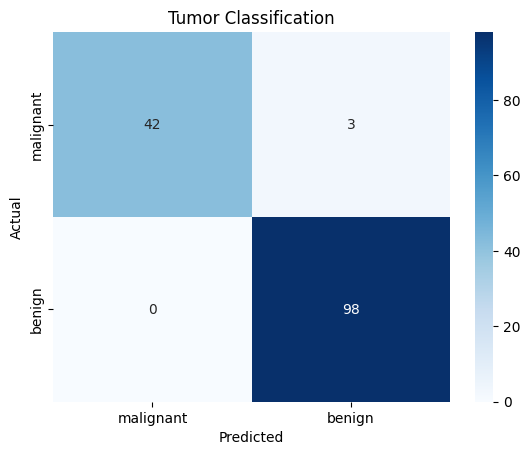

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=data.target_names))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tumor Classification")
plt.show()
